In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
# mpl.rcParams['pdf.fonttype'] = 42
import os
import h5py
import seaborn
# %matplotlib

In [2]:
file_path_now = os.getcwd()
print(file_path_now)
file_path = os.path.dirname(file_path_now)  
print(file_path)
file_path = os.path.dirname(file_path)  
print(file_path)

def df_to_dict(df):
    res={}
    keys=list(df.keys())
    for k in keys:
        try:
            for column in df[k].columns:
                if column.startswith('Unnamed'):
                    pass
                else:
                    res[column]=df[k][column]
        except:
                if k.startswith('Unnamed'):
                    pass
                else:
                    res[k]=df[k]
    return res
ENCODE_medical_wk_DATAPATH = file_path + "/Experimental_Results/data/train_data/MedNIST_hand_breast_wk.mat"
FashionMNIST_09_DATAPATH = file_path + "/Experimental_Results/data/train_data/FashionMNIST_0-9.mat"

def load_h5py_data(path):
    h5_file = h5py.File(path, mode="r")
    data = {}
    for dataset in h5_file.keys():
        data[dataset] = h5_file[dataset][()]
    return data
data_FS=load_h5py_data(FashionMNIST_09_DATAPATH)
data_MD= load_h5py_data(ENCODE_medical_wk_DATAPATH)

/home/zhide_lu/projects/Quantum_continual_leanring/Exp_quantum_continual_learning/Experimental_Results/Figure_3_demo_for_quantum_advantages
/home/zhide_lu/projects/Quantum_continual_leanring/Exp_quantum_continual_learning/Experimental_Results
/home/zhide_lu/projects/Quantum_continual_leanring/Exp_quantum_continual_learning


## Experimental and numerical results for sequentially learning the engineered quantum task and the classical task

In [3]:
df_EWC = pd.read_excel(file_path+r'/Experimental_Results/data/exp_10q/10q_loss_accuracy_EWC.xlsx',sheet_name=['task1','task2'])
df_no_EWC = pd.read_excel(file_path+r'/Experimental_Results/data/exp_10q/10q_loss_accuracy_without_EWC.xlsx',
                          sheet_name=['task1','task2'])
df_last_probs = pd.read_excel(file_path+r'/Experimental_Results/data/exp_10q/10q_last_step_probs_2_task.xlsx',
                                sheet_name=['task1','task2'])
df_relabel_results = pd.read_excel(file_path+r'/Experimental_Results/data/exp_10q/10q_relabel_result.xlsx')
res_EWC=df_to_dict(df_EWC)
res_no_EWC=df_to_dict(df_no_EWC)
last_probs=df_to_dict(df_last_probs)
relabel_results=df_to_dict(df_relabel_results)
lines=[20,20]
a4=np.array([180, 297]) / 25

classical_continual_learning_lambda_40 = h5py.File('../../Numerical_Simulations/demo_for_FFNN_learning_engineered_quantum&classical_tasks/classical_continual_learning_lambda_40.mat','r') ;
classical_continual_learning_for_all_lambda = h5py.File('../../Numerical_Simulations/demo_for_FFNN_learning_engineered_quantum&classical_tasks/classical_continual_learning_for_all_lambda.mat','r')

In [4]:
res_EWC[f'step{1+1}']

0     20
1     21
2     22
3     23
4     24
5     25
6     26
7     27
8     28
9     29
10    30
11    31
12    32
13    33
14    34
15    35
16    36
Name: step2, dtype: int64

## 将量子数据与经典数据画一起

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

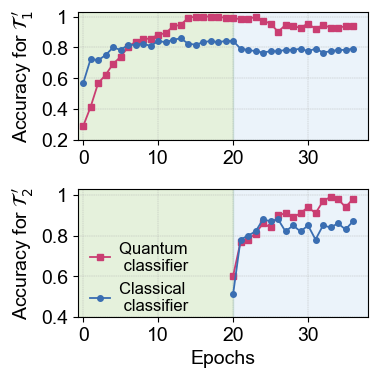

In [5]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 4, 4
plt.rcParams.update({'font.size': 14})

colors = [ [c/255 for c in [42, 176, 128] ], 
         [c/255 for c in [58, 110, 178] ],
        [c/255 for c in [202, 62, 114] ] ]

ax11 = plt.figure()
ax21 = plt.figure()
ax = (ax11, ax21)
fig, ax = plt.subplots(2, 1)


# ax[0].yaxis.set_major_locator(MaxNLocator(5))
# ax[0].xaxis.set_major_locator(MaxNLocator(5))

ax[0].plot(res_EWC['step1'], res_EWC['accuracy_test1'], color = colors[2], linestyle = "-", markevery = 1,
           marker = 's', markersize = 4, linewidth=1.3 )
ax[0].plot(res_EWC['step1'], classical_continual_learning_lambda_40["task_1"][:], color = colors[1], 
           linestyle = "-", markevery = 1, marker = 'o', markersize = 4, linewidth=1.3 )

ax[0].grid(linestyle='--', linewidth=0.3)
ax[0].set_ylabel('Accuracy for $\mathcal{T}_1^{\;\prime}$', labelpad = 4)     


ax[1].plot(res_EWC['step2'], res_EWC['accuracy_test2'], color = colors[2], linestyle = "-", markevery = 1,
            marker = 's', markersize = 4, linewidth=1.3 )

ax[1].plot(res_EWC['step2'], classical_continual_learning_lambda_40["task_2"][:], color = colors[1], 
           linestyle = "-", markevery = 1, marker = 'o', markersize = 4, linewidth=1.3 )

ax[1].grid(linestyle='--', linewidth=0.3)
ax[1].set_ylabel('Accuracy for $\mathcal{T}_2^{\;\prime}$', labelpad = 4)    

#-----------------------------------------------------
ax[0].set_xlim(-0.7, 38)
ax[0].set_ylim(0.2, 1.03)
ax[0].set_yticks(np.array([0.2, 0.4, 0.6, 0.8, 1]), [0.2, 0.4, 0.6, 0.8, 1], position = (0, 0.00))


ax[1].set_xlim(-0.7, 38)
ax[1].set_ylim(0.4, 1.03)
ax[1].set_yticks(np.array([ 0.4, 0.6, 0.8, 1]), [0.4, 0.6, 0.8, 1], position = (0, 0.00))


ax[1].legend(['Quantum \n classifier', 'Classical \n classifier'], loc=(0.02,  -0.03), frameon=False, labelspacing=0.5, 
             handlelength=1.2, handletextpad = 0.5, fontsize = 12)
ax[1].set_xlabel('Epochs', labelpad = 4)

ax[0].axvspan(-2,20,color = [c/255 for c in [169, 209, 142] ], alpha=0.3)
ax[0].axvspan(20,38,color =  [c/255 for c in [157, 195, 230] ], alpha=0.2)
ax[1].axvspan(-2,20,color = [c/255 for c in [169, 209, 142] ], alpha=0.3)
ax[1].axvspan(20,38,color =  [c/255 for c in [157, 195, 230] ], alpha=0.2)

plt.tight_layout()
plt.show()

In [ ]:
fig.savefig('advantage.pdf', format='pdf', bbox_inches='tight', facecolor='None')

## fisher information

In [ ]:
df_fisher_martix = pd.read_excel(file_path+r'/Experimental_Results/data/exp_10q/fisher_martix.xlsx',
                                 sheet_name=['fisher_martix'])
res_fisher_martix=df_to_dict(df_fisher_martix)
fisher_q = res_fisher_martix["quantum_label"]

In [ ]:
index_q = np.argsort(fisher_q)   
# fisher_q = np.array(fisher_q[index_q])

In [ ]:
df_grad_q = pd.read_excel(file_path+r'/Experimental_Results/data/exp_10q/10q_params_gradients.xlsx',
                               sheet_name=['gradients  EWC'])
grad_history_q = np.array(df_grad_q['gradients  EWC'])[:,1:].astype('float')

average_grad = np.mean([ grad_history_q[i] for i in range(20,36)], axis=0)

## parameter changes

In [ ]:
df_params_EWC = pd.read_excel(file_path+r'/Experimental_Results/data/exp_10q/10q_params_gradients.xlsx',
                              sheet_name=['params EWC'])
res_params_EWC=np.array(df_params_EWC['params EWC'])[:,1:].astype('float')

## results for classical learning

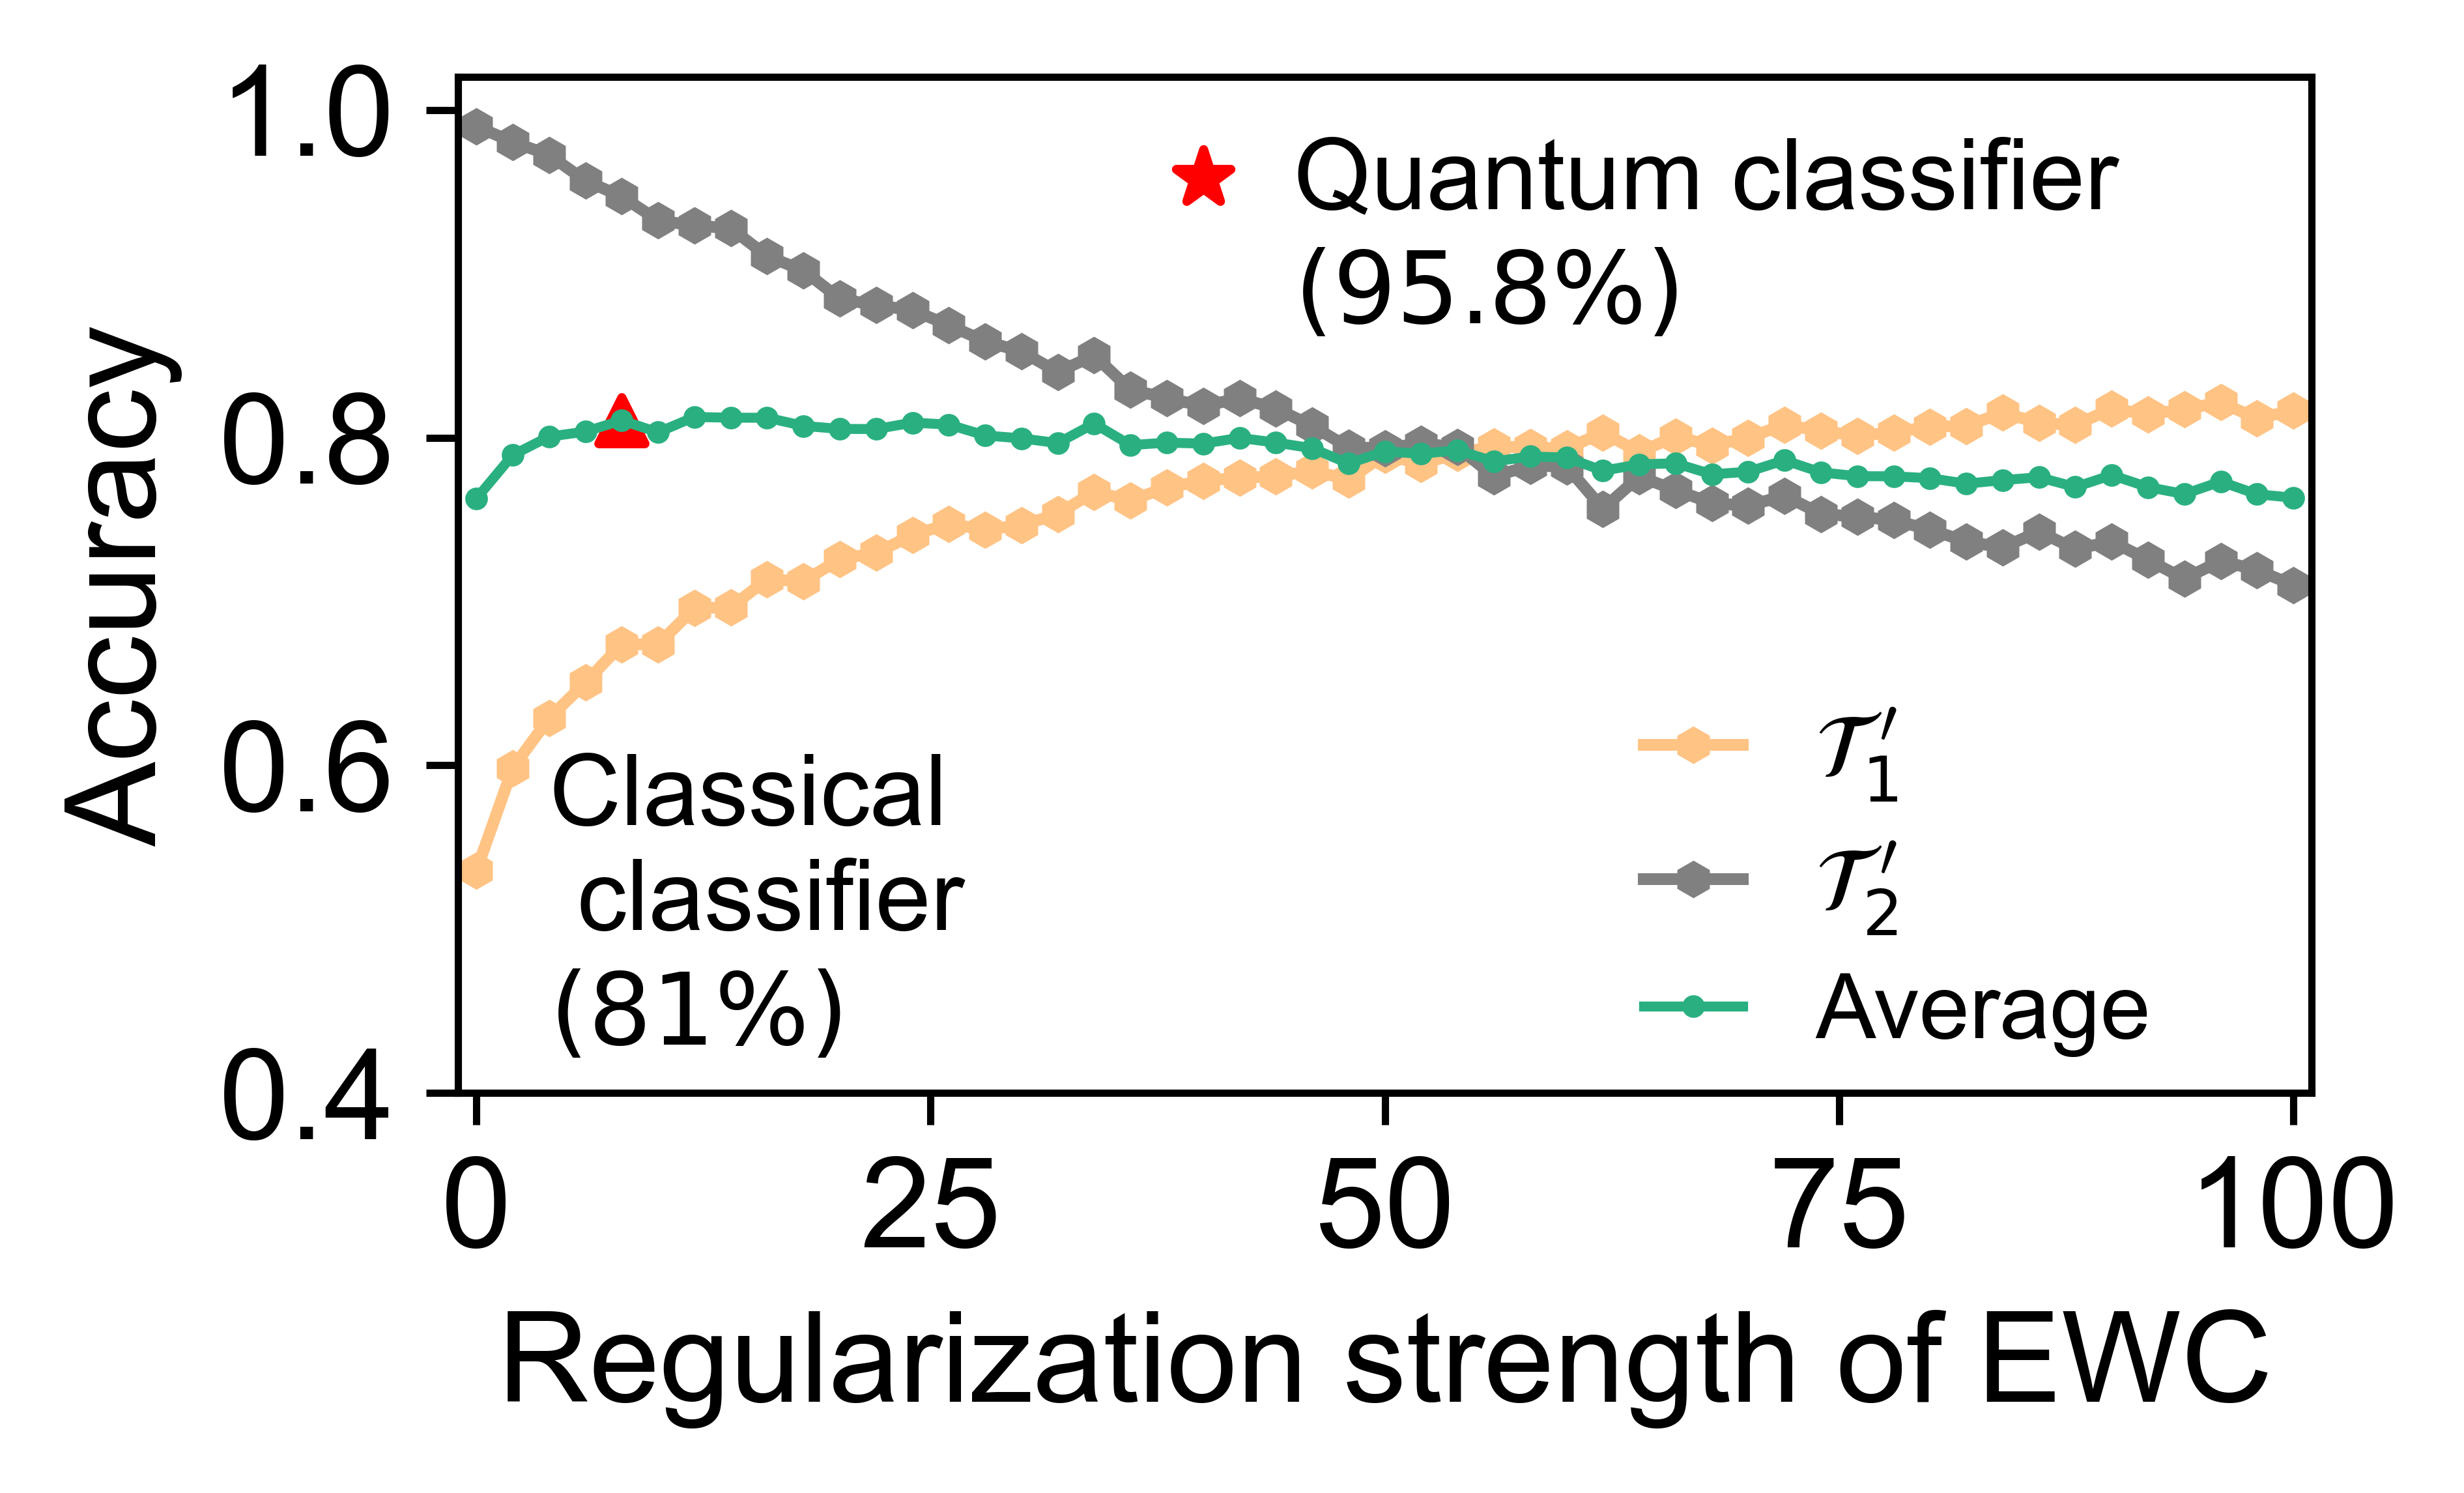

In [6]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 4, 2.5
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(dpi=1000)

lambda_list = classical_continual_learning_for_all_lambda["lambda"][:]  ;
task_1 = classical_continual_learning_for_all_lambda["task_1"][:]      ;
task_2 = classical_continual_learning_for_all_lambda["task_2"][:]     ;
average = (task_1 +task_2)/2  ;

ax.set_ylabel('Accuracy', labelpad = 4)    
ax.set_xlabel(r'Regularization strength of EWC', labelpad = 4)
ax.set_xlim(-1, 101)
ax.set_xticks(np.array([ 0, 25, 50, 75, 100]), [ 0, 25, 50, 75, 100], position = (0, 0.00))

ax.set_ylim(0.4, 1.02)
ax.text(45, 0.94, r'Quantum classifier', fontsize = 11)
ax.text(45, 0.87, r'$(95.8\%)$', fontsize = 11)

ax.text(4, 0.50,  'Classical \n classifier', fontsize = 11)
ax.text(4, 0.43,  r'$(81\%)$', fontsize = 11)

ax.scatter(40, (res_EWC['accuracy_test1'][36] + res_EWC['accuracy_test2'][16])/2, 
           marker='*', s = [40], color = "red")
ax.scatter(8, average[4], s = [26], marker='^', color = "red")


ax.plot(lambda_list, task_1, color = [c/255 for c in [255, 195, 132] ], linestyle = "-", markevery = 1,
           marker = 'h', markersize = 3, linewidth=1.3, label = "$\mathcal{T}_1^{\;\prime}$" )

ax.plot(lambda_list, task_2, color = "grey", linestyle = "-", markevery = 1,
           marker = 'h', markersize = 3, linewidth=1.3, label = "$\mathcal{T}_2^{\;\prime}$" )

ax.plot(lambda_list, (task_1 +task_2)/2, color = colors[0], linestyle = "-", marker = '.', markersize = 3,
        markevery = 1, linewidth=1.1,  label = "Average"  )

ax.legend( loc=(0.62, 0.0), frameon=False, labelspacing=0.4, handlelength=1.1, fontsize = 10)

plt.tight_layout()
plt.show()

In [ ]:
fig.savefig('classical_learning.pdf', format='pdf', bbox_inches='tight', facecolor='None')